<a href="https://colab.research.google.com/github/VadimPuzz/Coursera_capstone_project/blob/master/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%98%D0%BD%D1%82%D0%B5%D0%BD%D1%81%D0%B8%D0%B2_02_02_04_02_%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_%E2%84%962%22%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Рекомендации по устранению ошибок при использовании фреймворка.
Раздел 10.
[Документация terra_ai](https://drive.google.com/file/d/1NHB5qSv9xPeKJuidx5anh_UXRIlcpwwy/view?usp=sharing)

In [1]:
!pip install terra_ai

     |████████████████████████████████| 92kB 3.6MB/s 


In [2]:
from terra_ai import терра_ии

Все необходимые библиотеки установлены и готовы к работе


# 1.Задание: Определени заболевания по симптомам

In [3]:
# Загрузите базу симптомов заболеваний
терра_ии.загрузить_базу('СИМПТОМЫ ЗАБОЛЕВАНИЙ')

Загрузка данных
Это может занять несколько минут...
Загрузка данных завершена 

url: https://storage.googleapis.com/aiu_bucket/symptoms.zip



In [4]:
# Покажите примеры из базы "симптомы"
терра_ии.показать_примеры(база = 'симптомы')

В данной базе содержатся симптомы следующих заболеваний:
['Аппендицит', 'Гастрит', 'Гепатит', 'Дуоденит', 'Колит', 'Панкреатит', 'Холицестит', 'Эзофагит', 'Энтерит', 'Язва']

Пример симптомов случайного заболевания:
Заболевание:  Панкреатит
Симптомы:
     *    Боль при панкреатите обычно очень интенсивная, постоянная, характер болевых ощущений описывается 


In [6]:
количество_анализируемых_слов = 1100
размер_окна = 50
шаг = 10

# Создаем выборки для обучения нейронной сети
(обучающая_выборка, метки_обучающей_выборки), (тестовая_выборка, метки_тестовой_выборки) = терра_ии.создать_текстовые_выборки(
    количество_анализируемых_слов,
    размер_окна, 
    шаг)

Формирование выборки завершено


## Создайте нейронную сеть
Состоящую из 3-х ветвей, в которую будут входить слои рассмотренные на вебинаре, такие как:

*   Эмбеддинг
*   Дропаут
*   Выравнивающий
*   Полносвязный



In [19]:
# Создаем нейронную сеть
ветвь1 = 'Эмбеддинг-100-'+str(количество_анализируемых_слов)+'-'+str(размер_окна)+'\
 Дропаут-0.3\
 Выравнивающий\
 Полносвязный-200\
 Дропаут-0.4'
ветвь2 = 'Полносвязный-4096 Полносвязный-256 Дропаут-0.5 Полносвязный-64'
ветвь3 = 'Полносвязный-100'
нейронка = терра_ии.создать_составную_сеть(
    обучающая_выборка, метки_обучающей_выборки,
    ветвь1, ветвь2, ветвь3)

Схема модели:


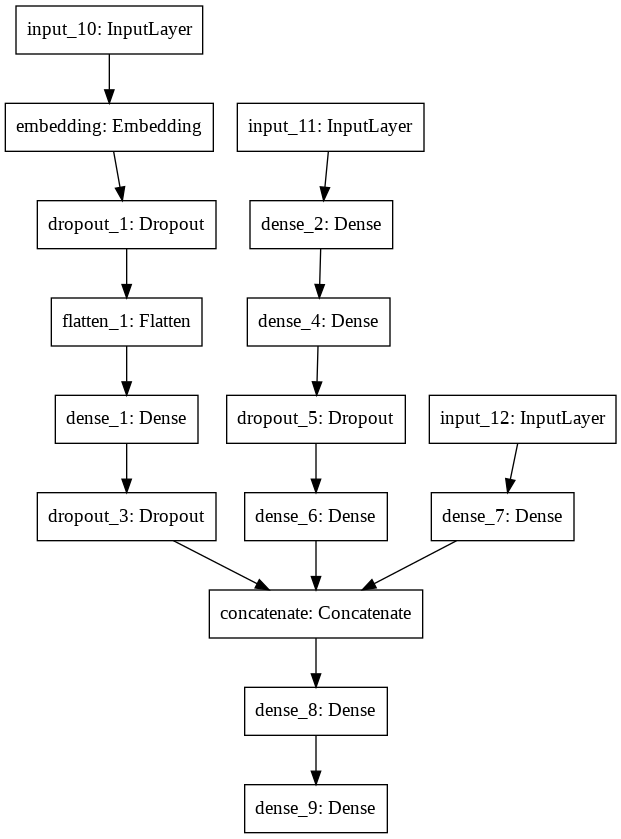

In [20]:
# Выводите структуру модели
терра_ии.схема_модели(нейронка)

## Обучите нейронную сеть
Используя свою модель, примените функцию из terra ai:
*   терра_ии.обучение_модели()




Эпоха №1  Время обучения: 117.15cТочность на обучающей выборке: 97.94%       Точность на проверочной выборке: 86.87%
Эпоха №2  Время обучения: 114.63cТочность на обучающей выборке: 100.0%       Точность на проверочной выборке: 86.25%
Эпоха №3  Время обучения: 112.98cТочность на обучающей выборке: 100.0%       Точность на проверочной выборке: 86.25%
Эпоха №4  Время обучения: 112.62cТочность на обучающей выборке: 100.0%       Точность на проверочной выборке: 89.38%
Эпоха №5  Время обучения: 110.45cТочность на обучающей выборке: 100.0%       Точность на проверочной выборке: 86.87%
Эпоха №6  Время обучения: 113.32cТочность на обучающей выборке: 100.0%       Точность на проверочной выборке: 86.87%
Эпоха №7  Время обучения: 109.79cТочность на обучающей выборке: 100.0%       Точность на проверочной выборке: 86.87%
Эпоха №8  Время обучения: 111.0c Точность на обучающей выборке: 100.0%       Точность на проверочной выборке: 88.13%
Эпоха №9  Время обучения: 111.95cТочность на обучающей выборке: 

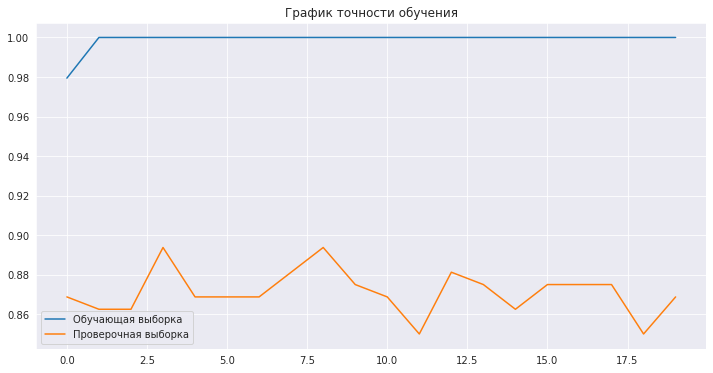

In [23]:
# Обучаем модель
терра_ии.обучение_модели(
    нейронка,
    обучающая_выборка, метки_обучающей_выборки,
    тестовая_выборка, метки_тестовой_выборки,
    размер_пакета = 16,
    количество_эпох = 20)

## Продемонстрируйте работу нейронной сети
Используя обученую модель для симптовов указанных в ячейке, примените функцию из terra ai:
*   терра_ии.тест_модели_симптомы()

In [28]:
# Демонстрация результата работы нейронной сети
терра_ии.тест_модели_симптомы(нейронка,размер_окна,шаг,
симптомы, классы = ['Дуоденит', 'Аппендицит', 'Гастрит',
'Энтерит', 'Язва', 'Панкреатит', 'Гепатит', 'Колит',
'Эзофагит', 'Холицестит'])

Дуоденит       -  1.12 %
Аппендицит     -  0.3 %
Гастрит        -  2.86 %
Энтерит        -  1.25 %
Язва           -  1.47 %
Панкреатит     -  5.3 %
Гепатит        -  2.4 %
Колит          -  3.42 %
Эзофагит       -  77.56 %
Холицестит     -  4.32 %

Диагноз: Эзофагит - 77.56%


# 2.Задание. Предсказание цены квартиры
Добейтесь точности модели по квартирам в районе 650К (в идеале 600К).

In [29]:
# Загружаем базу квартир
терра_ии.загрузить_базу(база = 'КВАРТИРЫ', справка = True)

Загрузка данных завершена 

url: https://storage.googleapis.com/aiu_bucket/moscow.csv
Загружена база квартир



In [30]:
# Показываем примеры
терра_ии.показать_пример_квартиры(количество=3)

* Пример объявления: 

Количество комнат:  1
Площадь квартиры:   38.3/17.3/?
Метро/ЖД станция:   Лесопарковая м.
От станции:         5п
Дом:                10/19 М
Балкон:             Л
Санузел:            С
Примечание:         Cкидки до 15% в августе. Продается однокомнатная квартира (266) в новостройке Лесопарковый по адресу Москва, Варшавское шоссе, вл. 170Е. Общая площадь квартиры - 38.31 кв.м. Тип проекта, по которому построен дом - монолит. Способы оплаты можно уточнить у продавца. Более подробная информация по телефону.
-----------
Цена квартиры:     7 млн  452 тыс рублей
---------------------------------------------------------------------------------------------------------------

* Пример объявления: 

Количество комнат:  1
Площадь квартиры:   43.3/21.3/9
Метро/ЖД станция:   Кунцевская м.
От станции:         15п
Дом:                11/14 П
Балкон:             2Л
Санузел:            С
Примечание:         Полностью СВОБОДНА, (никто не прописан и не проживает), ПРЯМАЯ продажа, 1

In [31]:
# Создаем выборки
(обучающая_выборка, метки_обучающей_выборки), (тестовая_выборка, метки_тестовой_выборки), инструменты = терра_ии.создать_выборки_квартир()

## Создайте нейронную сеть
Состоящую из 2-х ветвей и финальной части, в которую будует входить слой рассмотренный на вебинаре:

*   Полносвязный


In [32]:
ветвь1 = 'Полносвязный-100-relu Полносвязный-50-linear'
ветвь2 = 'Полносвязный-500-linear'
финальная_часть = 'Полносвязный-1000-relu Полносвязный-500-relu Полносвязный-100-relu Полносвязный-1-linear'
нейронка_2 = терра_ии.создать_составную_сеть_квартиры(обучающая_выборка, ветвь1, ветвь2, финальная_часть)

Схема модели:


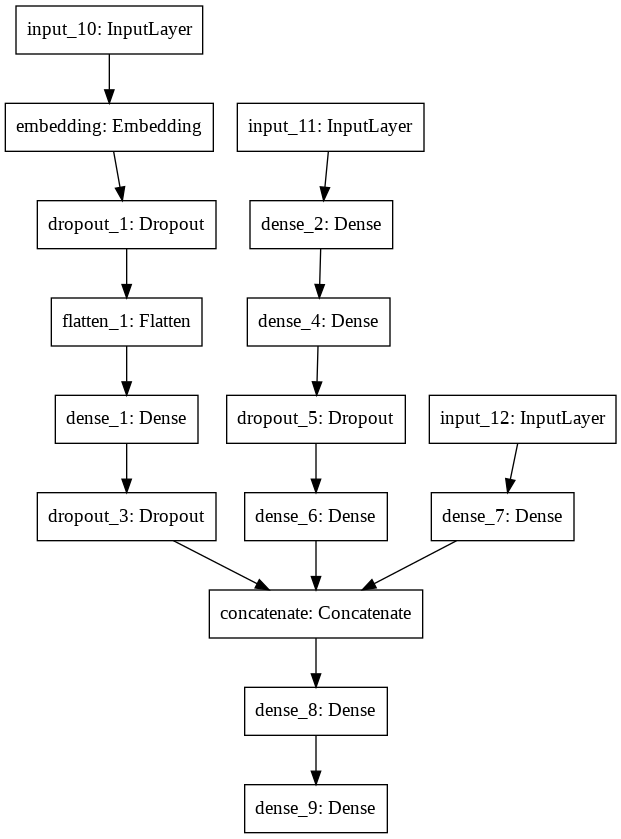

In [33]:
# Выводим схему модели
терра_ии.схема_модели(нейронка)

## Обучите нейронную сеть
Используя свою модель, применяю функцию из terra ai:
*   терра_ии.обучение_модели_квартиры()

Эпоха №1  Время обучения: 35.72c Ошибка на обучающей выборке: 1.564млн       Ошибка на проверочной выборке: 1.441млн
Эпоха №2  Время обучения: 32.37c Ошибка на обучающей выборке: 1.59млн        Ошибка на проверочной выборке: 1.552млн
Эпоха №3  Время обучения: 32.53c Ошибка на обучающей выборке: 1.251млн       Ошибка на проверочной выборке: 1.229млн
Эпоха №4  Время обучения: 32.54c Ошибка на обучающей выборке: 1.293млн       Ошибка на проверочной выборке: 1.228млн
Эпоха №5  Время обучения: 33.32c Ошибка на обучающей выборке: 0.954млн       Ошибка на проверочной выборке: 1.058млн
Эпоха №6  Время обучения: 34.11c Ошибка на обучающей выборке: 1.148млн       Ошибка на проверочной выборке: 1.13млн
Эпоха №7  Время обучения: 32.8c  Ошибка на обучающей выборке: 0.98млн        Ошибка на проверочной выборке: 1.078млн
Эпоха №8  Время обучения: 33.65c Ошибка на обучающей выборке: 0.807млн       Ошибка на проверочной выборке: 0.943млн
Эпоха №9  Время обучения: 32.08c Ошибка на обучающей выборке: 0.8

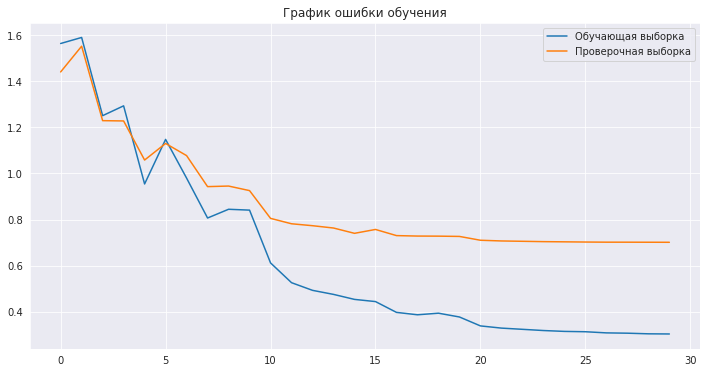

In [34]:
# Обучаем модель
терра_ии.обучение_модели_квартиры(нейронка_2,
обучающая_выборка, метки_обучающей_выборки,
тестовая_выборка, метки_тестовой_выборки,
размер_пакета = 128,
количество_эпох = 10,
инструменты = инструменты)

In [35]:
#@title Тестирование модели: выберите параметры
метро = "\u0411\u0430\u0440\u0440\u0438\u043A\u0430\u0434\u043D\u0430\u044F \u043C." #@param ['Авиамоторная м.', 'Автозаводская м.', 'Автозаводская м. (МЦК)', 'Академическая м.', 'Алабушево станция', 'Александровский Сад м.', 'Алексеевская м.', 'Алма-Атинская м.', 'Алтуфьево м.', 'Андроновка м. (МЦК)', 'Аннино м.', 'Апрелевка станция', 'Арбатская м.', 'Аэропорт (старая) станция', 'Аэропорт Внуково станция', 'Аэропорт м.', 'Бабушкинская м.', 'Багратионовская м.', 'Балтийская м. (МЦК)', 'Баррикадная м.', 'Бауманская м.', 'Беговая м.', 'Бекасово-1 станция', 'Белокаменная м. (МЦК)', 'Беломорская м.', 'Белорусская м.', 'Беляево м.', 'Бибирево м.', 'Библиотека им.Ленина м.', 'Битцевский парк м.', 'Борисово м.', 'Боровицкая м.', 'Боровское шоссе м.', 'Ботанический сад м.', 'Ботанический сад м. (МЦК)', 'Братиславская м.', 'Бульвар Адмирала Ушакова м.', 'Бульвар Дмитрия Донского м.', 'Бульвар Рокоссовского м.', 'Бульвар Рокоссовского м. (МЦК)', 'Бунинская аллея м.', 'Бутырская м.', 'ВДНХ м.', 'Варшавская м.', 'Верхние Котлы м. (МЦК)', 'Верхние Лихоборы м.', 'Весенняя станция', 'Владыкино м.', 'Внуково станция', 'Водный стадион м.', 'Войковская м.', 'Волгоградский проспект м.', 'Волжская м.', 'Волоколамская м.', 'Воробьевы Горы м.', 'Выставочная м.', 'Выхино м.', 'Говорово м.', 'Гривно станция', 'Дачная станция', 'Деловой центр м.', 'Динамо м.', 'Дмитровская м.', 'Добрынинская м.', 'Домодедовская м.', 'Достоевская м.', 'Дубровка м.', 'Дубровка м. (МЦК)', 'Жулебино м.', 'ЗИЛ м. (МЦК)', 'Зорге м. (МЦК)', 'Зябликово м.', 'Измайлово м. (МЦК)', 'Измайловская м.', 'Калужская м.', 'Кантемировская м.', 'Каховская м.', 'Каширская м.', 'Киевская м.', 'Китай-Город м.', 'Кожуховская м.', 'Кокошкино станция', 'Коломенская м.', 'Колхозная станция', 'Коммунарка м.', 'Комсомольская м.', 'Коньково м.', 'Коптево м. (МЦК)', 'Косино м.', 'Котельники м.', 'Красногвардейская м.', 'Краснопресненская м.', 'Красносельская м.', 'Красные ворота м.', 'Крекшино станция', 'Крестьянская Застава м.', 'Кропоткинская м.', 'Крылатское м.', 'Крымская м. (МЦК)', 'Кузнецкий мост м.', 'Кузьминки м.', 'Кунцевская м.', 'Курская м.', 'Кутузовская м.', 'Кутузовская м. (МЦК)', 'Ленинский проспект м.', 'Лермонтовский проспект м.', 'Лесопарковая м.', 'Лихоборы м. (МЦК)', 'Локомотив м. (МЦК)', 'Ломоносовский проспект м.', 'Лубянка м.', 'Лужники м. (МЦК)', 'Лухмановская м.', 'Львовская станция', 'Люблино м.', 'Марксистская м.', 'Марьина Роща м.', 'Марьино м.', 'Маяковская м.', 'Медведково м.', 'Международная м.', 'Менделеевская м.', 'Минская м.', 'Митино м.', 'Мичуринец станция', 'Мичуринский проспект м.', 'Молодежная м.', 'Мякинино м.', 'Нагатинская м.', 'Нагорная м.', 'Нахимовский проспект м.', 'Некрасовка м.', 'Нижегородская м. (МЦК)', 'Нижегородская улица м.', 'Новогиреево м.', 'Новокосино м.', 'Новокузнецкая м.', 'Новопеределкино м.', 'Новослободская м.', 'Новохохловская м. (МЦК)', 'Новоясеневская м.', 'Новые Черемушки м.', 'Озерная м.', 'Окружная м.', 'Окружная м. (МЦК)', 'Окская улица м.', 'Октябрьская м.', 'Октябрьское поле м.', 'Ольховая м.', 'Орехово м.', 'Отрадное м.', 'Охотный ряд м.', 'Павелецкая м.', 'Панфиловская м. (МЦК)', 'Парк Победы м.', 'Парк культуры м.', 'Партизанская м.', 'Первомайская м.', 'Перово м.', 'Петровский парк м.', 'Петровско-Разумовская м.', 'Печатники м.', 'Пионерская м.', 'Планерная м.', 'Площадь Гагарина м. (МЦК)', 'Площадь Ильича м.', 'Площадь Революции м.', 'Победа станция', 'Подольск станция', 'Полежаевская м.', 'Полянка м.', 'Пражская м.', 'Преображенская площадь м.', 'Прокшино м.', 'Пролетарская м.', 'Проспект Вернадского м.', 'Проспект Мира м.', 'Профсоюзная м.', 'Пушкинская м.', 'Пятницкое шоссе м.', 'Раменки м.', 'Рассказовка м.', 'Рассудово станция', 'Речной вокзал м.', 'Рижская м.', 'Римская м.', 'Ростокино м. (МЦК)', 'Румянцево м.', 'Рязанский проспект м.', 'Савеловская м.', 'Савеловская метро', 'Саларьево м.', 'Свиблово м.', 'Севастопольская м.', 'Селигерская м.', 'Семеновская м.', 'Серпуховская м.', 'Силикатная станция', 'Славянский бульвар м.', 'Смоленская м.', 'Сокол м.', 'Соколиная Гора м. (МЦК)', 'Сокольники м.', 'Солнцево м.', 'Спартак м.', 'Спортивная м.', 'Сретенский бульвар м.', 'Стахановская м.', 'Столбово м.', 'Стрешнево м. (МЦК)', 'Строгино м.', 'Студенческая м.', 'Сухаревская м.', 'Сходненская м.', 'Таганская м.', 'Тверская м.', 'Театральная м.', 'Текстильщики м.', 'Теплый стан м.', 'Технопарк м.', 'Тимирязевская м.', 'Толстопальцево станция', 'Третьяковская м.', 'Тропарево м.', 'Трубная м.', 'Тульская м.', 'Тургеневская м.', 'Тушинская м.', 'Угрешская м. (МЦК)', 'Улица 1905 года м.', 'Улица Академика Янгеля м.', 'Улица Горчакова м.', 'Улица Дмитриевского м.', 'Улица Скобелевская м.', 'Улица Старокачаловская м.', 'Университет м.', 'Филатов луг м.', 'Филевский парк м.', 'Фили м.', 'Фонвизинская м.', 'Фрунзенская м.', 'Ховрино м.', 'Хорошево м. (МЦК)', 'Хорошевское м.', 'ЦСКА м.', 'Царицыно м.', 'Цветной бульвар м.', 'Черкизовская м.', 'Чертановская м.', 'Чеховская м.', 'Чистые пруды м.', 'Чкаловская м.', 'Шаболовская м.', 'Шелепиха м.', 'Шелепиха м. (МЦК)', 'Шипиловская м.', 'Шоссе Энтузиастов м.', 'Шоссе Энтузиастов м. (МЦК)', 'Щелковская м.', 'Щербинка станция', 'Щукинская м.', 'Электрозаводская м.', 'Юго-Восточная м.', 'Юго-Западная м.', 'Южная м.', 'Ясенево м.']
до_станции = 5 #@param {type:"integer"}
способ_передвижения = "пешком" #@param ['пешком', 'транспорт']
этаж =  1#@param {type:"integer"}
всего_этажей = 14 #@param {type:"integer"}
тип_балкона = 'Л' #@param ['Л', 'Б', '2Б', '-', '2Б2Л', 'БЛ', '3Б', '2Л', 'Эрк', 'Б2Л', 'ЭркЛ', '3Л', '4Л', '*Л', '*Б']
тип_санузла = '2' #@param ['2', 'Р', 'С', '-', '2С', '+', '4Р', '2Р', '3С', '4С', '4', '3', '3Р']
площадь = 55.6 #@param {type:"number"}
описание = '' #@param {type:"string"}

## Запустите тест модели

In [37]:
# Тестируем модель
терра_ии.тест_модели_квартиры(
    нейронка_2, инструменты, 
    метро, до_станции, способ_передвижения, этаж, всего_этажей, тип_балкона, тип_санузла, площадь, описание)

Цена квартиры: 12млн  427тыс рублей
